<a href="https://colab.research.google.com/github/wisestonster/forecast_BTC/blob/main/forecast_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

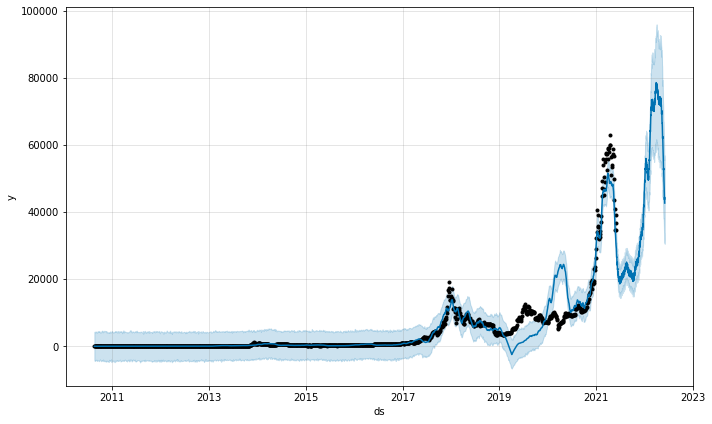

In [3]:
# 비트코인 가격 가져오는 링크
# https://www.blockchain.com/ko/charts/market-price?timespan=60days

# 프로핏으로 가격 예측하기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fbprophet import Prophet

# prophet을 사용하기 위해서는 다음과 같이 피처의 이름을 변경해야 합니다 : 'ds', 'y'
bitcoin_df = pd.read_csv('market-price_210604.csv', names=['ds', 'y'])
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

# periods 일을 내다보며 예측합니다.
future_data = prophet.make_future_dataframe(periods=365, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

#예측값 찍어보기
fig1 = prophet.plot(forecast_data)

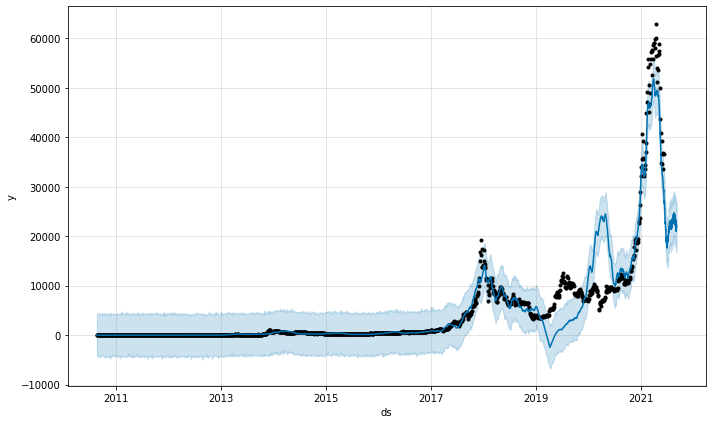

In [6]:
# prophet을 사용하기 위해서는 다음과 같이 피처의 이름을 변경해야 합니다 : 'ds', 'y'
bitcoin_df = pd.read_csv('market-price_210611.csv', names=['ds', 'y'])
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

# periods 일을 내다보며 예측합니다.
future_data = prophet.make_future_dataframe(periods=90, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

#예측값 찍어보기
fig1 = prophet.plot(forecast_data)

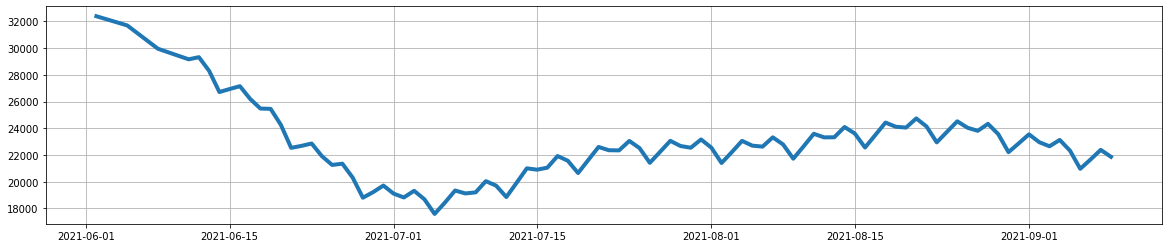

In [28]:
# 최근 날짜 기준으로 예측 그래프 그리기
recent_data = forecast_data[forecast_data['ds'] > '2021-06-01']
recent_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
plt.plot(recent_data['ds'], recent_data['yhat'])

plt.rcParams["figure.figsize"] = (40,8)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

plt.show()